# Analysis of the Wind Energy Generation Potential in Colombian Cities.

### Project Description

This project aims to evaluate the potential for wind energy generation in various Colombian cities by analyzing wind speed data and fitting it to a **Weibull distribution**. The Weibull distribution is widely used in wind energy studies to model wind speed variability, and here it will help identify cities with the highest probabilities of favorable wind conditions for energy generation.

**Objectives**:
1. Fit the Weibull distribution to wind speed data for each city.
2. Calculate key parameters such as percentiles, interquartile range (IQR), and probabilities of critical wind speeds.
3. Compare cities to determine which have the highest potential for wind energy generation.

## Import Libraries

First, we will load the necessary libraries for data analysis and visualization.

## Libraries for data manipulation

In [6]:
import numpy as np
import pandas as pd

## Libraries for visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## Library for distribution fitting

In [11]:
from scipy.stats import weibull_min

## Visualization settings

In [13]:
sns.set(style="whitegrid")

## Load dataset

Now, let's load the dataset in CSV format and check its structure. This dataset contains wind speed data for various cities in Colombia.

In [19]:
file_path = "/Users/mapublume/Downloads/Datos(Municipios).csv"

data = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')

data.head()

,fecha,T (°C),Tmin (°C),Tmax (°C),Precipitaciones (mm),dir_viento (°),vel_viento (m/s),pres (hPa),Municipio
0,1/01/2020,"28,2","25,9","32,5",0,9,17,"1010,5",Barranquilla
1,2/01/2020,"27,9",25,"33,3",0,14,"15,7","1010,9",Barranquilla
2,3/01/2020,"27,9","23,4","32,2",0,6,"13,9","1012,2",Barranquilla
3,4/01/2020,"27,9",23,"33,1",0,15,"13,3","1013,3",Barranquilla
4,5/01/2020,"27,8","25,8","33,1",0,6,"22,9","1014,1",Barranquilla


## Verification of Columns and Missing Data
Before proceeding with the analysis, we will check the structure of the columns and if there are any missing data.

## Check columns and missing data

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17341 entries, 0 to 17340
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fecha                 17341 non-null  object
 1   T (°C)                17341 non-null  object
 2   Tmin (°C)             17341 non-null  object
 3   Tmax (°C)             17341 non-null  object
 4   Precipitaciones (mm)  17341 non-null  object
 5   dir_viento (°)        17341 non-null  int64 
 6   vel_viento (m/s)      17341 non-null  object
 7   pres (hPa)            17341 non-null  object
 8   Municipio             17341 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


## Exploration of Available Cities
To perform an analysis on all the cities present in the dataset, we will identify the unique cities in the relevant column.

## Get a list of unique cities

In [52]:
cities = data['Municipio'].unique()
print(f"Available cities in the dataset: {len(cities)}")
print(cities)

Available cities in the dataset: 12
['Barranquilla' 'Bucaramanga' 'Cartagena' 'Girardot' 'Guapí' 'Medellín'
 'Mocoa' 'Riohacha' 'San Andrés' 'Santa Marta' 'Tumaco' 'Valledupar']


## Iterate over each city and filter data

In [59]:
# Create a dictionary to store the results for each city
city_results = {}

# Iterate over each unique city in the dataset
for city in cities:
    # Filter the data specific to the city
    city_data = data[data['Municipio'] == city]
    
    # Extract the wind speed column
    wind_speeds = city_data['vel_viento (m/s)'].values
    
    # Weibull Fit (placeholder)
    # Calculate the Weibull distribution parameters using scipy
    # Fitting and storing shape (k) and scale (c) parameters:
    # shape, loc, scale = weibull_min.fit(wind_speeds, floc=0)
    
    # Save the results in the dictionary
    city_results[city] = {
        "wind_speeds": wind_speeds,
        # "k": shape,  # Shape parameter (example)
        # "c": scale,  # Scale parameter (example)
        # Other specific calculations can be added here
    }

# Display a summary of each city's data
for city, results in city_results.items():
    print(f"City: {city}")
    print(f"Wind speeds: {results['wind_speeds'][:5]}...")  # Shows the first 5 wind speeds
    # print(f"Shape parameter (k): {results['k']}")
    # print(f"Scale parameter (c): {results['c']}")
    print("\n")


City: Barranquilla
Wind speeds: ['17' '15,7' '13,9' '13,3' '22,9']...


City: Bucaramanga
Wind speeds: ['9' '7,9' '7,5' '6,5' '7,2']...


City: Cartagena
Wind speeds: ['13' '11,8' '11' '11,1' '17,9']...


City: Girardot
Wind speeds: ['4,6' '3,7' '3,8' '4,8' '3,3']...


City: Guapí
Wind speeds: ['4,8' '7,1' '7,1' '8,1' '6,3']...


City: Medellín
Wind speeds: ['5,9' '7,8' '6,6' '6,4' '7,1']...


City: Mocoa
Wind speeds: ['4,6' '4,2' '3,2' '3,3' '3']...


City: Riohacha
Wind speeds: ['24,9' '19,9' '13,3' '10,8' '11,3']...


City: San Andrés
Wind speeds: ['13,9' '15,8' '16,3' '18,2' '19,1']...


City: Santa Marta
Wind speeds: ['9,3' '7,7' '6,4' '6,9' '5,9']...


City: Tumaco
Wind speeds: ['9,9' '13,2' '10' '7,7' '6,6']...


City: Valledupar
Wind speeds: ['27,3' '24,3' '18,5' '15,7' '14,2']...




# Histograms of the wind speed and temperatures variables, and calculation of coefficient of variation.

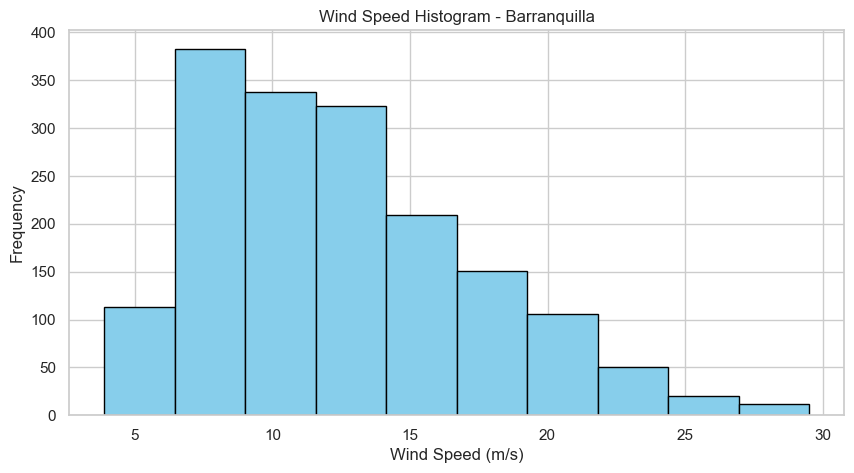

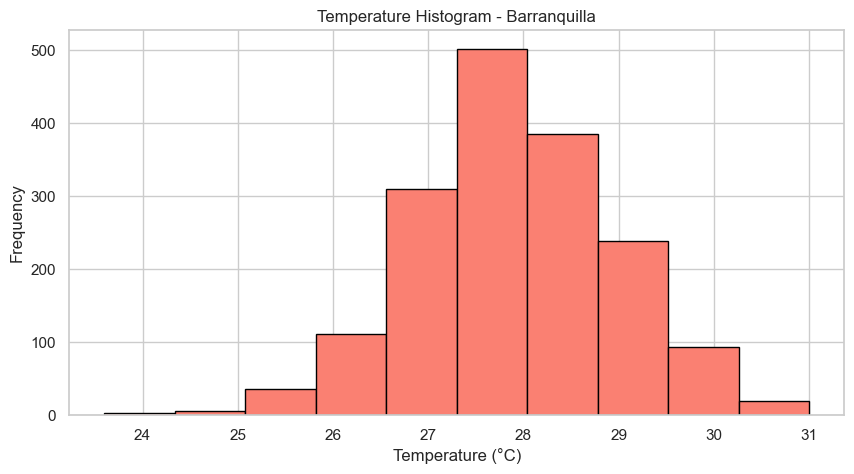

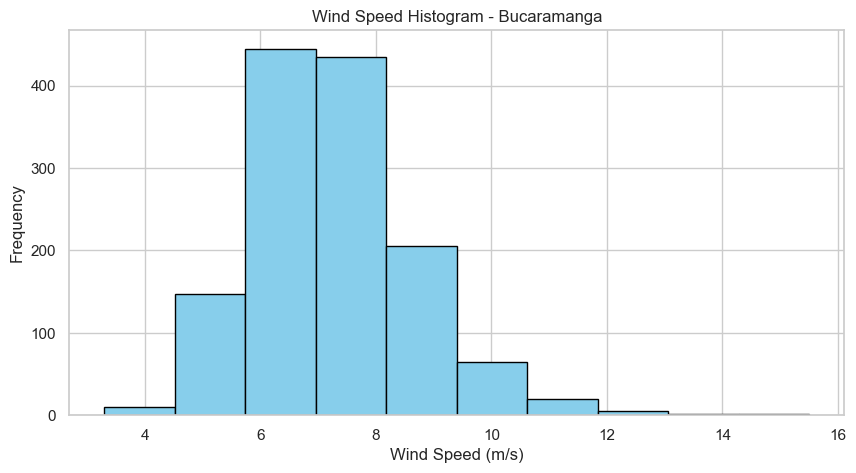

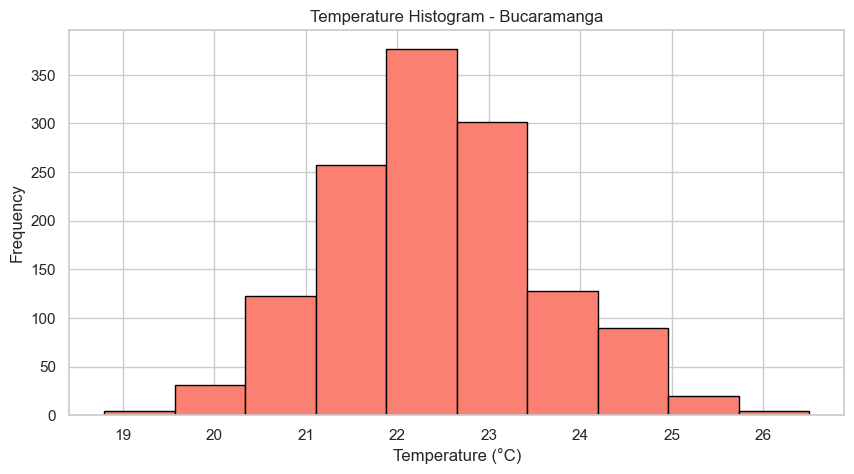

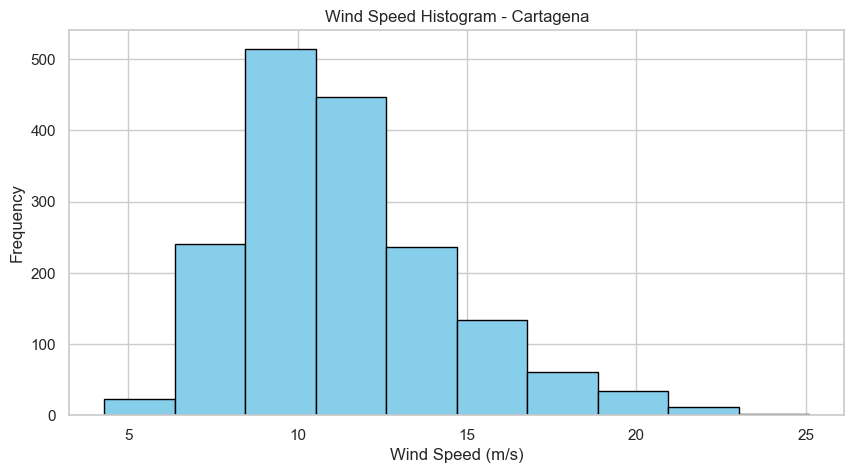

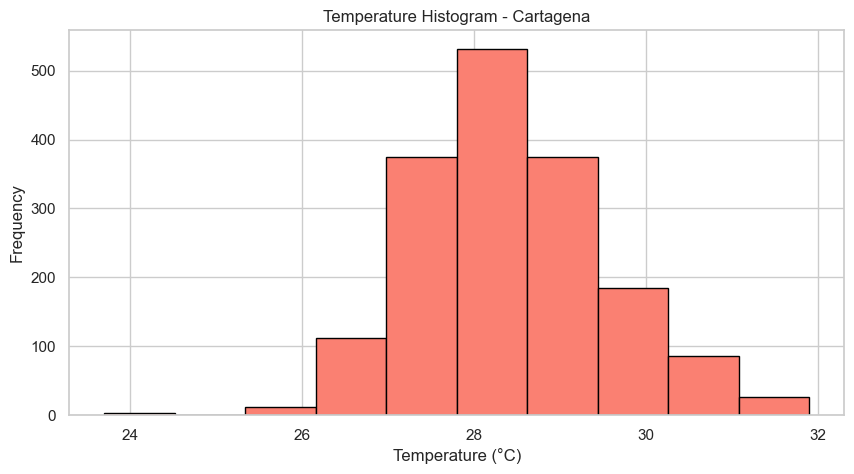

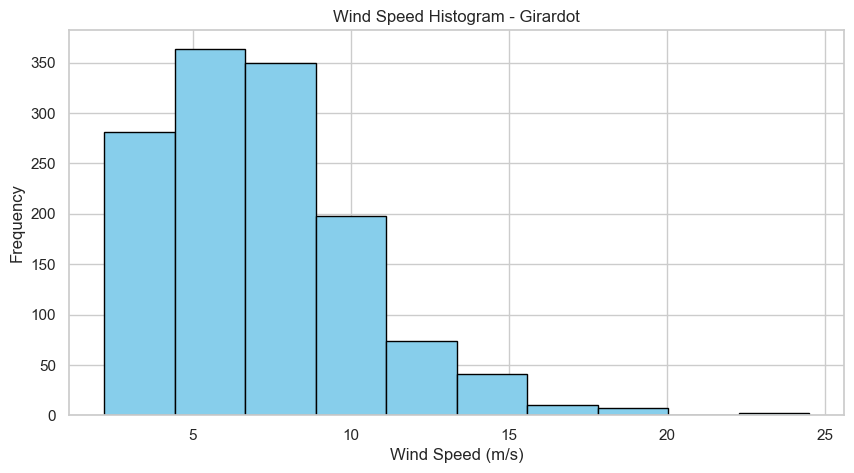

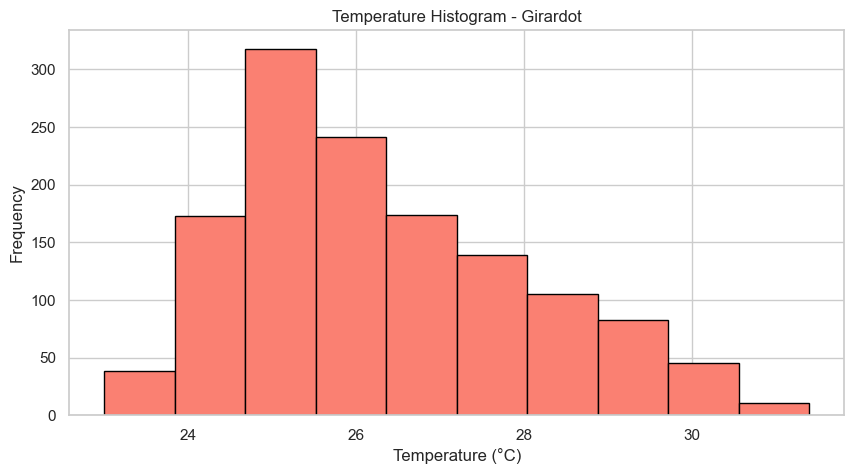

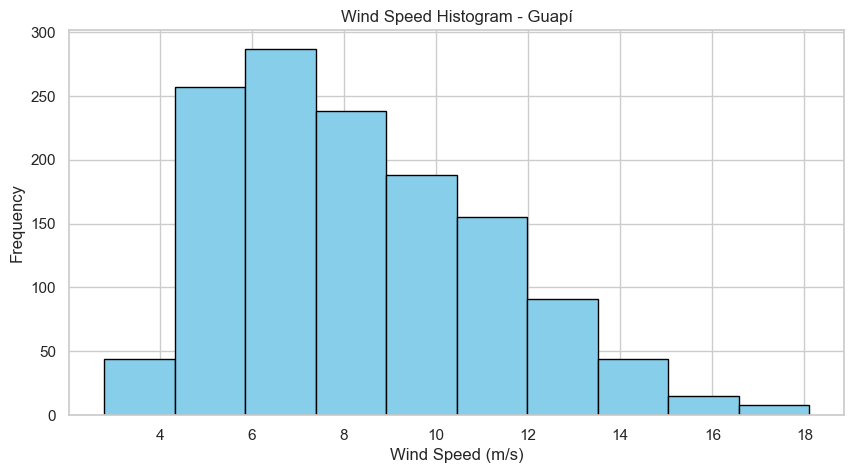

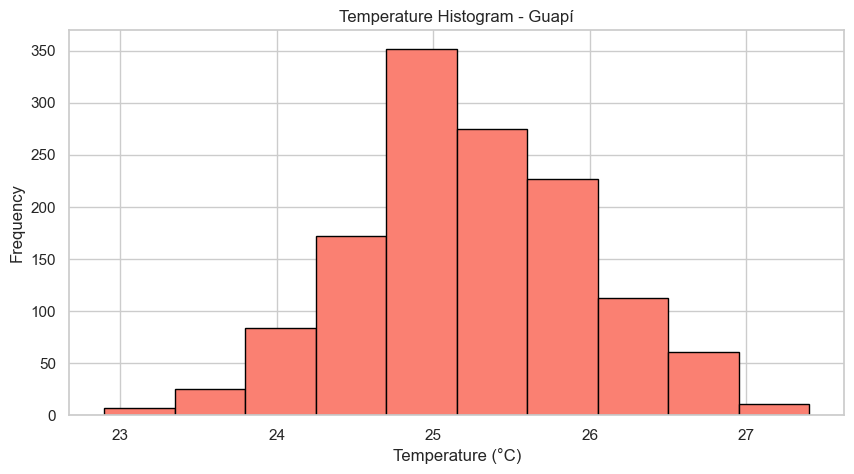

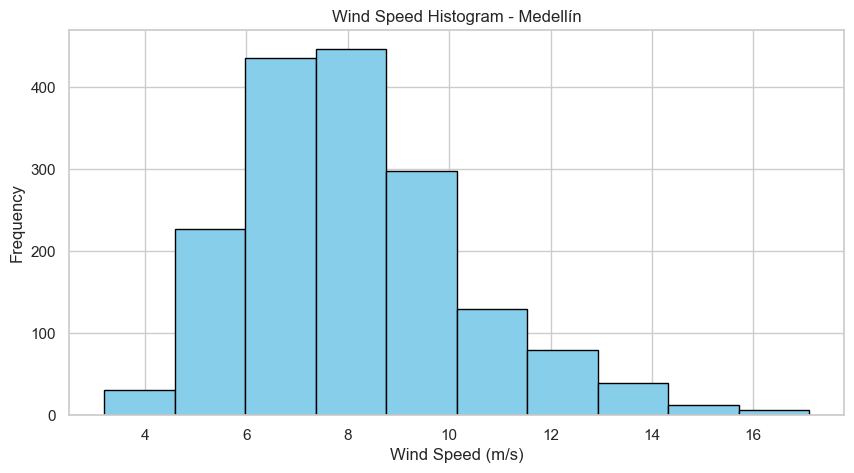

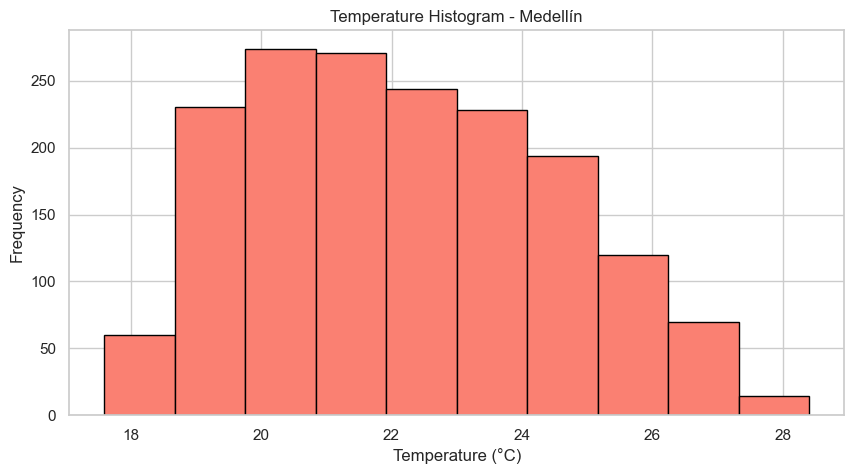

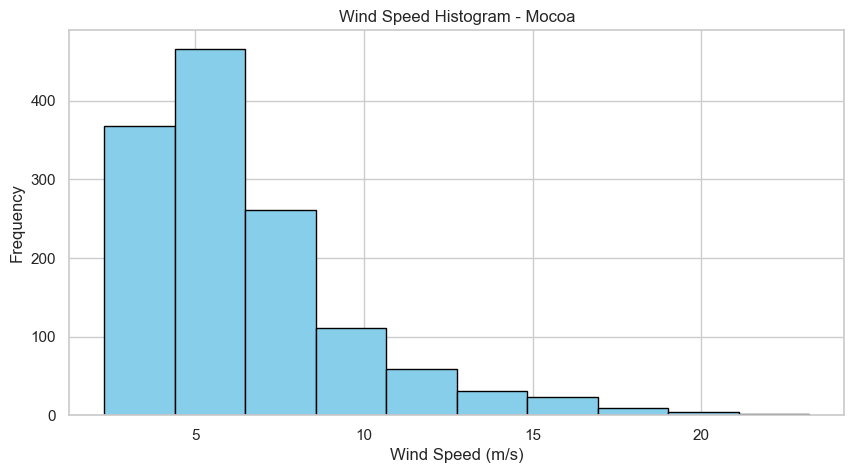

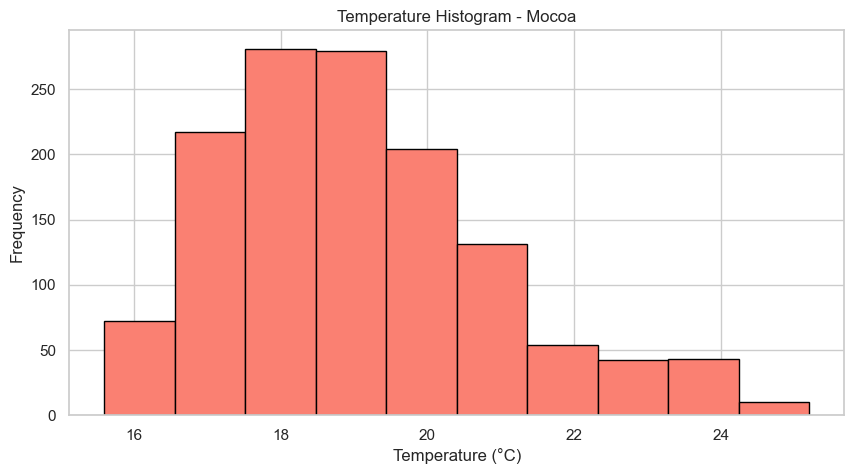

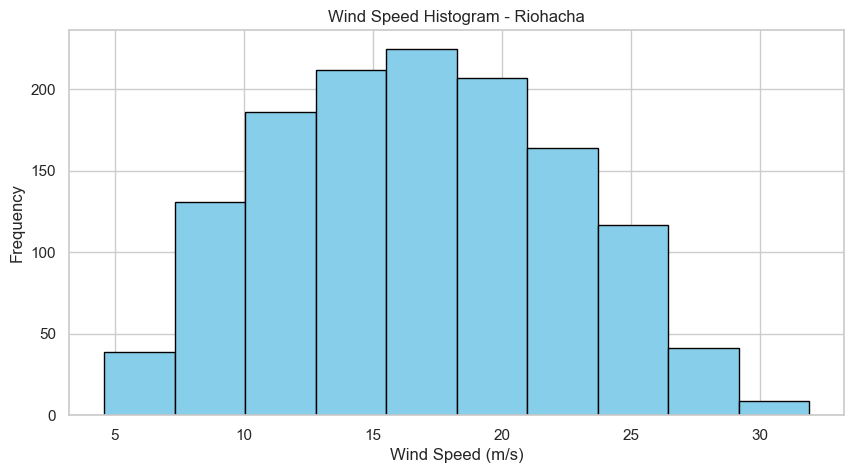

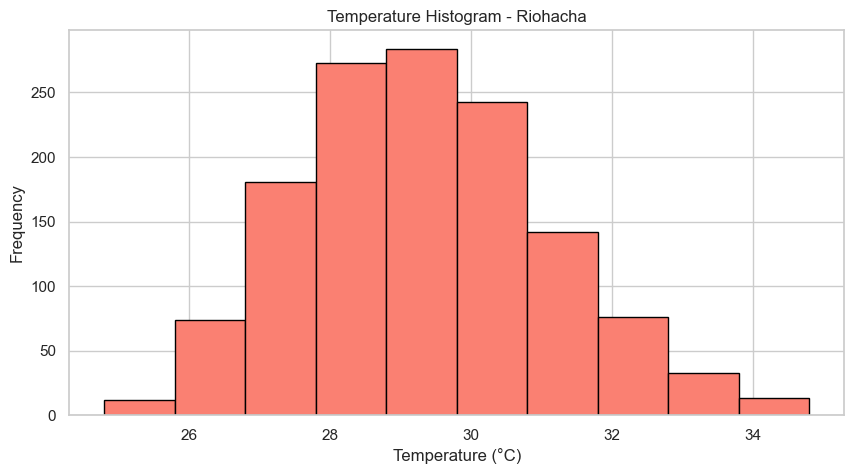

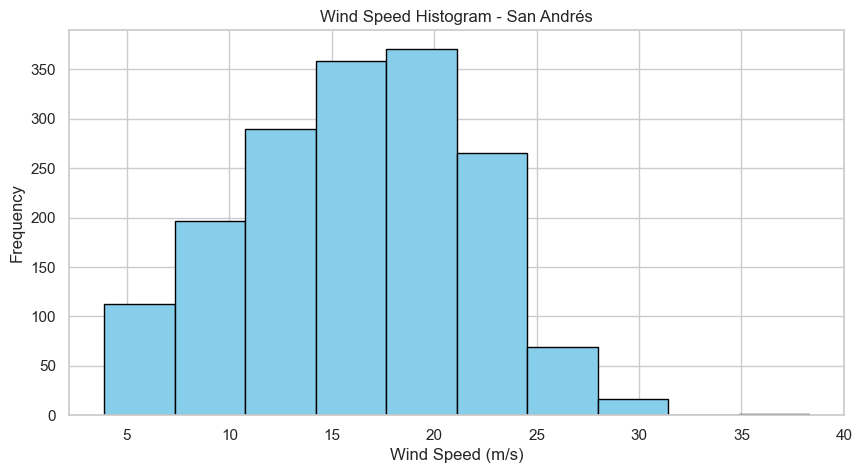

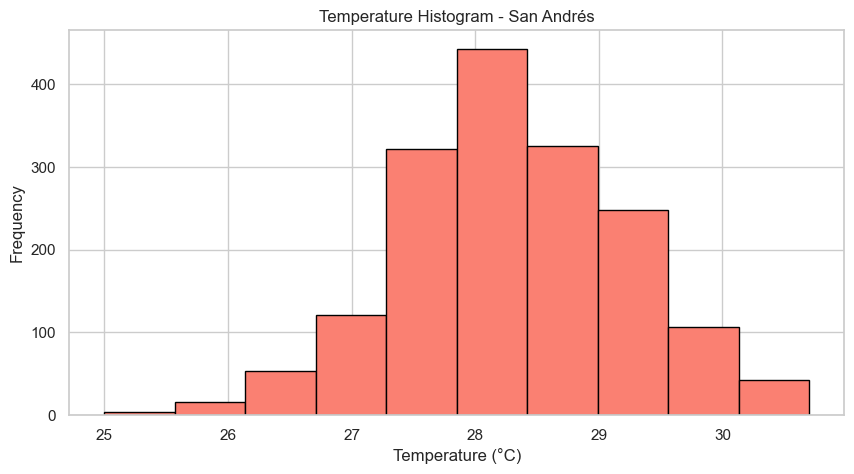

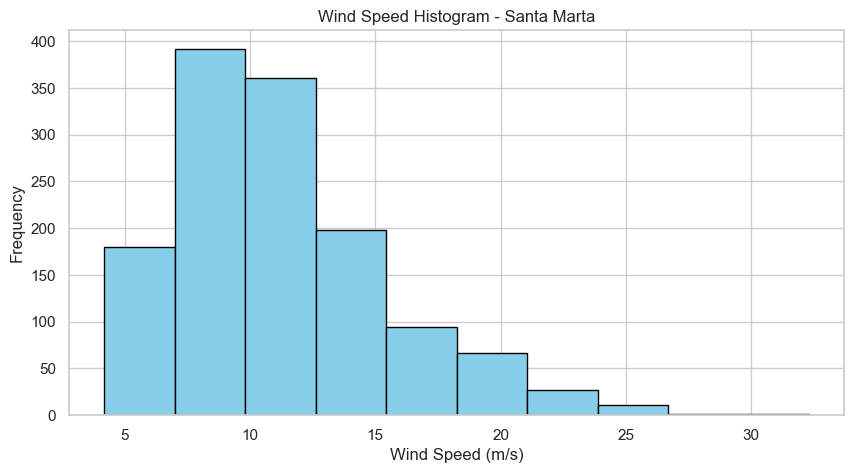

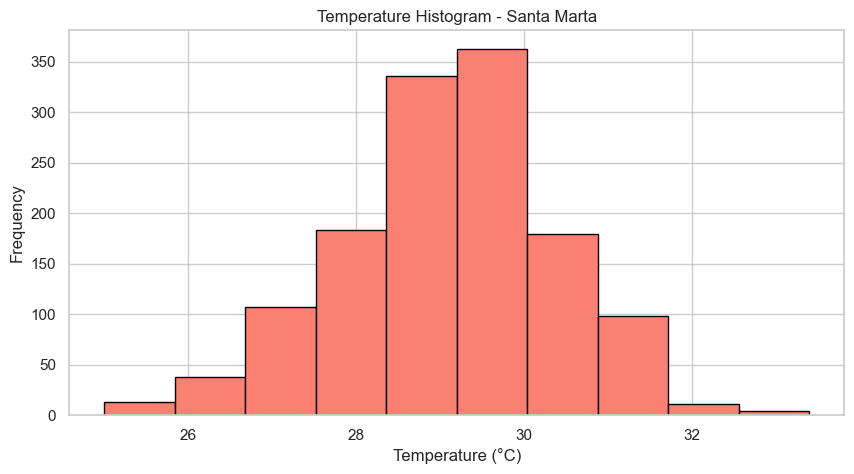

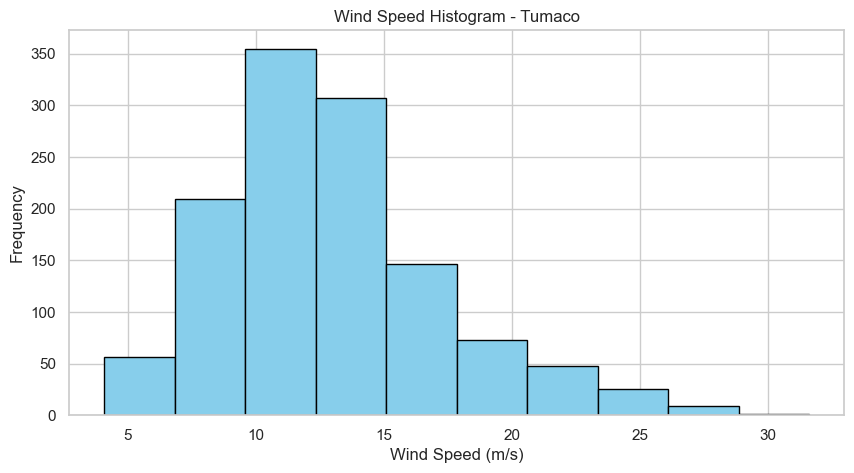

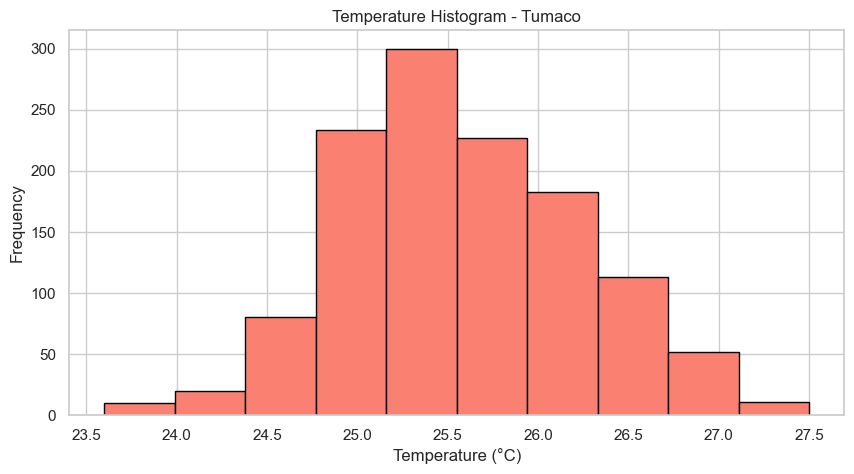

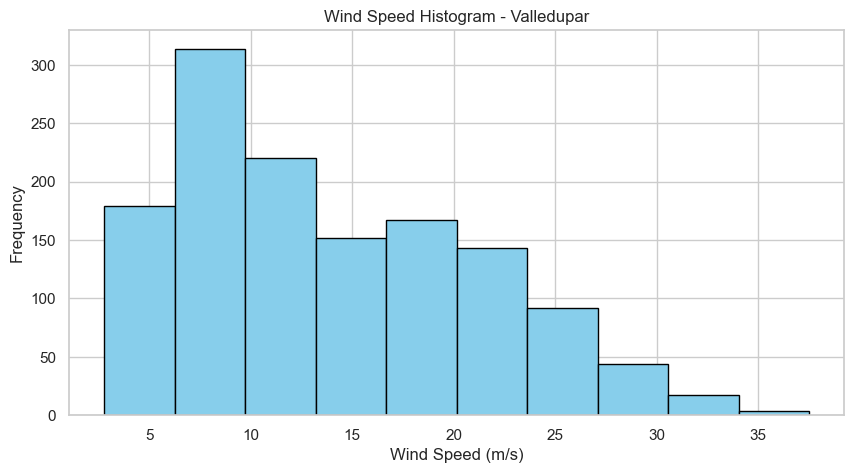

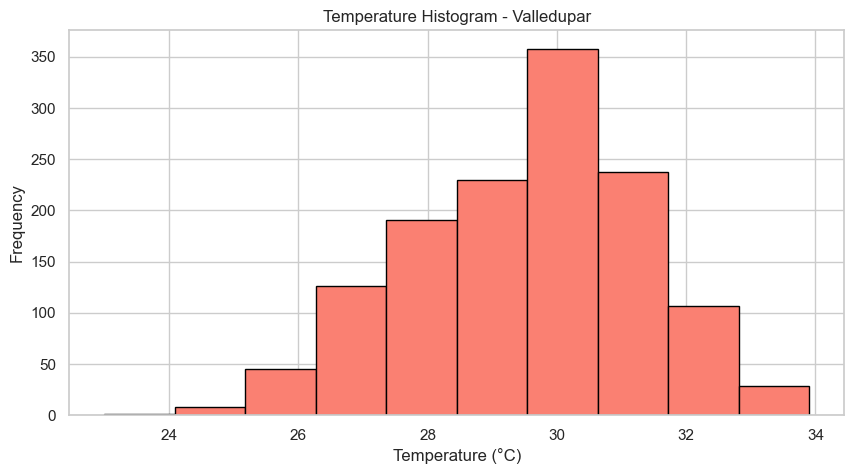

Coefficient of Variation by City:
            City  Wind Speed CV (%)  Temperature CV (%)
0     Valledupar          51.277673            6.051148
1          Mocoa          47.651479            9.720118
2       Girardot          42.436103            6.470705
3   Barranquilla          38.942138            3.781674
4    Santa Marta          36.988810            4.414881
5          Guapí          34.191811            2.940575
6     San Andrés          33.801708            3.231429
7         Tumaco          33.291091            2.641476
8       Riohacha          33.027477            5.963466
9      Cartagena          27.402807            3.919418
10      Medellín          27.219917           10.299157
11   Bucaramanga          19.076099            5.140565


In [64]:
# Create a list to store the coefficient of variation for each city
coef_variation_cities = []

# Iterate over each city to generate histograms and calculate the coefficient of variation
for city, city_data in data.groupby('Municipio'):
    # Convert string representations of numbers to floats
    city_data['vel_viento (m/s)'] = city_data['vel_viento (m/s)'].str.replace(',', '.').astype(float)
    city_data['T (°C)'] = city_data['T (°C)'].str.replace(',', '.').astype(float)

    # Wind Speed Histogram for each city
    plt.figure(figsize=(10, 5))
    plt.hist(city_data['vel_viento (m/s)'].dropna(), bins=10, color="skyblue", edgecolor="black")
    plt.title(f"Wind Speed Histogram - {city}")
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Frequency")
    plt.show()

    # Temperature Histogram for each city
    plt.figure(figsize=(10, 5))
    plt.hist(city_data['T (°C)'].dropna(), bins=10, color="salmon", edgecolor="black")
    plt.title(f"Temperature Histogram - {city}")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Frequency")
    plt.show()

    # Calculate the Coefficient of Variation for Wind Speed and Temperature
    cv_wind = city_data['vel_viento (m/s)'].std() / city_data['vel_viento (m/s)'].mean() * 100
    cv_temp = city_data['T (°C)'].std() / city_data['T (°C)'].mean() * 100

    # Store the results in the list
    coef_variation_cities.append({
        "City": city,
        "Wind Speed CV (%)": cv_wind,
        "Temperature CV (%)": cv_temp
    })

# Create a DataFrame sorted by the coefficient of variation for wind speed
cv_df = pd.DataFrame(coef_variation_cities)
cv_df = cv_df.sort_values(by="Wind Speed CV (%)", ascending=False).reset_index(drop=True)

# Display the table of coefficients of variation
print("Coefficient of Variation by City:")
print(cv_df)

# Variability Analysis

The variability in wind speed and temperature is assessed using the coefficient of variation (CV). The following analysis is based on these results:

### Wind Speed Variability:

- The city with the highest variability in wind speed is Valledupar, with a coefficient of variation of 51.28%. This indicates that wind speed in Valledupar has significant dispersion relative to its mean, suggesting greater fluctuations compared to other cities.
- Mocoa and Girardot also show high variability in wind speed, with coefficients of variation of 47.65% and 42.44%, respectively.
- In contrast, Bucaramanga has the lowest wind speed variability, with a coefficient of variation of 19.08%.

### Temperature Variability:

- Medellín exhibits the highest temperature variability, with a coefficient of variation of 10.30%. This indicates that temperatures in Medellín have more notable fluctuations compared to other cities.
- On the other hand, Guapí and Tumaco have the lowest temperature variability, with coefficients of variation of 2.94% and 2.64%, respectively, suggesting more stable temperatures.

This variability analysis can impact the assessment of wind energy potential, as higher wind speed variability may indicate less predictable wind conditions, potentially making continuous wind energy generation less favorable.

# Box-and-Whisker Diagrams to Compare Wind Speed and Temperature Variability Across Cities.

This allows us to visualize the dispersion and outliers of both variables in each city.

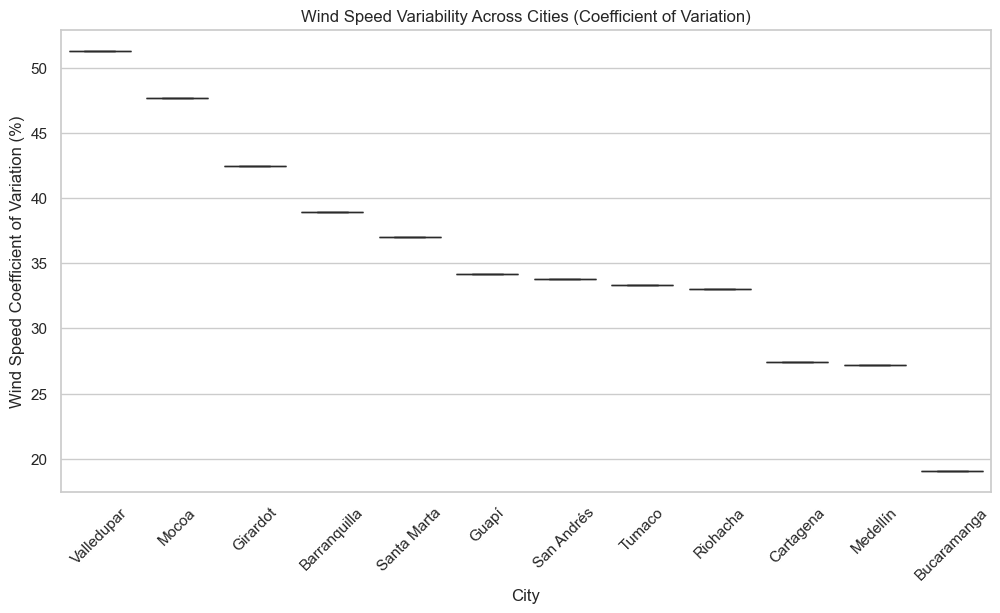

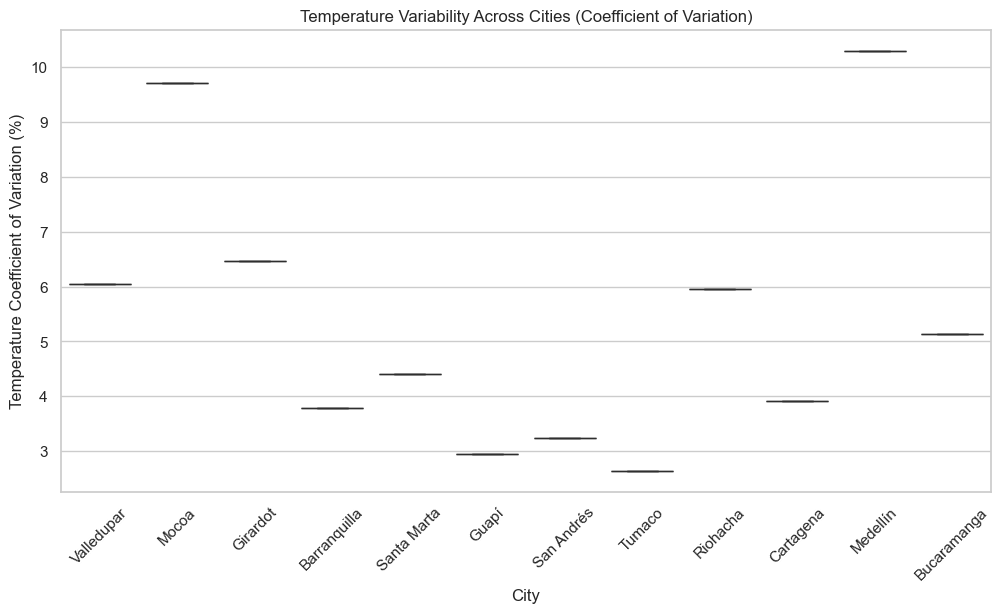

In [82]:
# Coefficient of Variation Data
data = pd.DataFrame({
    "City": ["Valledupar", "Mocoa", "Girardot", "Barranquilla", "Santa Marta", "Guapí",
             "San Andrés", "Tumaco", "Riohacha", "Cartagena", "Medellín", "Bucaramanga"],
    "Wind Speed CV (%)": [51.28, 47.65, 42.44, 38.94, 36.99, 34.19, 33.80, 33.29, 33.03, 27.40, 27.22, 19.08],
    "Temperature CV (%)": [6.05, 9.72, 6.47, 3.78, 4.41, 2.94, 3.23, 2.64, 5.96, 3.92, 10.30, 5.14]
})

# Box plot to compare Wind Speed variability across cities.
plt.figure(figsize=(12, 6))
sns.boxplot(x="City", y="Wind Speed CV (%)", data=data, palette="Blues", hue="City", dodge=False, legend=False)
plt.xticks(rotation=45)
plt.title("Wind Speed Variability Across Cities (Coefficient of Variation)")
plt.xlabel("City")
plt.ylabel("Wind Speed Coefficient of Variation (%)")
plt.show()

# Box plot to compare Temperature variability across cities.
plt.figure(figsize=(12, 6))
sns.boxplot(x="City", y="Temperature CV (%)", data=data, palette="Oranges", hue="City", dodge=False, legend=False)
plt.xticks(rotation=45)
plt.title("Temperature Variability Across Cities (Coefficient of Variation)")
plt.xlabel("City")
plt.ylabel("Temperature Coefficient of Variation (%)")
plt.show()

While histograms show the internal distribution of a variable within a city, box and whisker plots allow you to quickly see the dispersion and relative position of the coefficient of variation between cities. This facilitates the identification of cities with greater and lesser variability.

The two box and whisker plots for the coefficient of variation (CV) of wind speed and temperature provide us with the following key values ​​to interpret the dispersion of these data between cities:

## Box and Whisker Diagram of the Coefficient of Variation of Wind Speed
   
**Minimum Value (Bottom Line of Box):** This is the lowest CV value among cities, excluding outliers. In our case, the city with the lowest CV in wind speed was Bucaramanga, which represents relatively stable wind conditions.

**First Quartile (Q1):** Marks the lower limit of 25% of the CV data. This quartile indicates cities with low variability in wind speed, which could have more constant conditions for wind energy generation.

**Median (Line in the Center of the Box):** The median or the 50th percentile shows us the central value of the CV, dividing the cities into two halves in terms of variability in the wind.

**Third Quartile (Q3):** Represents the upper limit of 75% of the data, indicating cities with moderate variability.

**Maximum Value (Top Line of Box):** This is the highest value of the CV, excluding outliers. Valledupar was one of the cities with the highest CV, indicating significantly variable wind conditions.

**Outliers:** Cities that exceed the expected range (outside the box and whiskers) indicate unusual variability and less predictable wind conditions, as in the case of Mocoa and Valledupar.

## Box and Whisker Diagram of the Coefficient of Temperature Variation

**Minimum Value (Bottom Line of the Box):** The minimum CV of the temperature corresponds to cities with stable temperatures, such as Guapí and Tumaco, where the climate tends to be more constant.

**First Quartile (Q1):** The lower 25% of temperature CVs indicate cities with low variability in their climate.

**Median (Line in the Center of the Box):** The median indicates the central value, dividing the cities into two halves of temperature variability.

**Third Quartile (Q3):** This is the upper limit of the 75% of temperature CVs and shows cities with moderate variability.

**Maximum Value (Top Line of the Box):** The city with the highest temperature CV was Medellín, indicating greater daily thermal fluctuations.

**Outliers:** In this case, no extreme outliers were detected, suggesting that most cities have comparable thermal variability patterns.

# Calculate the parameters $k$ and $c$ of the Weibull distribution.

To calculate the parameters 
$k$ and $c$ from the Weibull distribution for each city, and then calculate the probability density function 
$f(v)$, we will follow the equations shown below:

## Parameter $k$:

$k = (σ/μ)^{-1.09}$

where: $σ$ is the standard deviation of the wind speed, and $μ$ is the average wind speed.

## Parameter $c$:

$c = \frac{μ}{Γ(1+\frac{1}{k})}$

where: $Γ$ is the gamma function, and $k$ is the parameter calculated in the previous step.

## Probability Density Function $f(v)$:

$f(v) = \frac{k}{c}(\frac{v}{c})^{k-1}exp(-(\frac{v}{c})^k)$

In [50]:
import pandas as pd  # Importing pandas to use the pd alias
from scipy.special import gamma
from scipy.stats import weibull_min
import numpy as np  # Importing numpy for numerical operations

# Load data
file_path = "/Users/mapublume/Downloads/Datos(Municipios).csv"

data = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')

# Convert 'vel_viento (m/s)' to numeric, forcing errors to NaN
data['vel_viento (m/s)'] = pd.to_numeric(data['vel_viento (m/s)'], errors='coerce')

# Optionally, drop rows with NaN values in 'vel_viento (m/s)'
data.dropna(subset=['vel_viento (m/s)'], inplace=True)

# Create a dictionary to store the results.
resultados_weibull = {}

# Iterate over each city to calculate k, c, and the probability density function.
for ciudad, datos_ciudad in data.groupby('Municipio'):
    # Calculate the average and standard deviation of wind speed.
    velocidad_media = datos_ciudad['vel_viento (m/s)'].mean()
    desviacion_std = datos_ciudad['vel_viento (m/s)'].std()
    
    # Calculate the parameter k using the given equation.
    k = (desviacion_std / velocidad_media) ** -1.09
    
    # Calculate the parameter c using the gamma function
    c = velocidad_media / gamma(1 + (1 / k))
    
    # Calculate the probability density function for each wind speed value.
    velocidades = datos_ciudad['vel_viento (m/s)'].values
    f_v = (k / c) * (velocidades / c) ** (k - 1) * np.exp(-(velocidades / c) ** k)
    
    # Save the results to the dictionary.
    resultados_weibull[ciudad] = {
        "k": k,
        "c": c,
        "densidad_probabilidad": f_v
    }

# Show results by city.
for ciudad, resultados in resultados_weibull.items():
    print(f"Ciudad: {ciudad}")
    print(f"Parámetro k: {resultados['k']:.4f}")
    print(f"Parámetro c: {resultados['c']:.4f}")
    print(f"Densidad de probabilidad (primeros 5 valores): {resultados['densidad_probabilidad'][:5]}")
    print("-" * 40)

Ciudad: Barranquilla
Parámetro k: 2.7525
Parámetro c: 13.7109
Densidad de probabilidad (primeros 5 valores): [0.04801807 0.03054324 0.01165636 0.00309605 0.03054324]
----------------------------------------
Ciudad: Bucaramanga
Parámetro k: 5.7975
Parámetro c: 7.6462
Densidad de probabilidad (primeros 5 valores): [0.12647387 0.27259955 0.27259955 0.27259955 0.27259955]
----------------------------------------
Ciudad: Cartagena
Parámetro k: 4.3476
Parámetro c: 12.7088
Densidad de probabilidad (primeros 5 valores): [0.12241467 0.12370724 0.12951257 0.12241467 0.02622237]
----------------------------------------
Ciudad: Girardot
Parámetro k: 2.6786
Parámetro c: 7.8106
Densidad de probabilidad (primeros 5 valores): [0.13536572 0.10085568 0.09441673 0.06370729 0.09441673]
----------------------------------------
Ciudad: Guapí
Parámetro k: 3.1359
Parámetro c: 9.2245
Densidad de probabilidad (primeros 5 valores): [0.12377932 0.12377932 0.1278091  0.10464646 0.07937592]
------------------------

# Graph of the probability distribution obtained with the Weibull distribution and compare it with the histogram of the wind speed for each city.

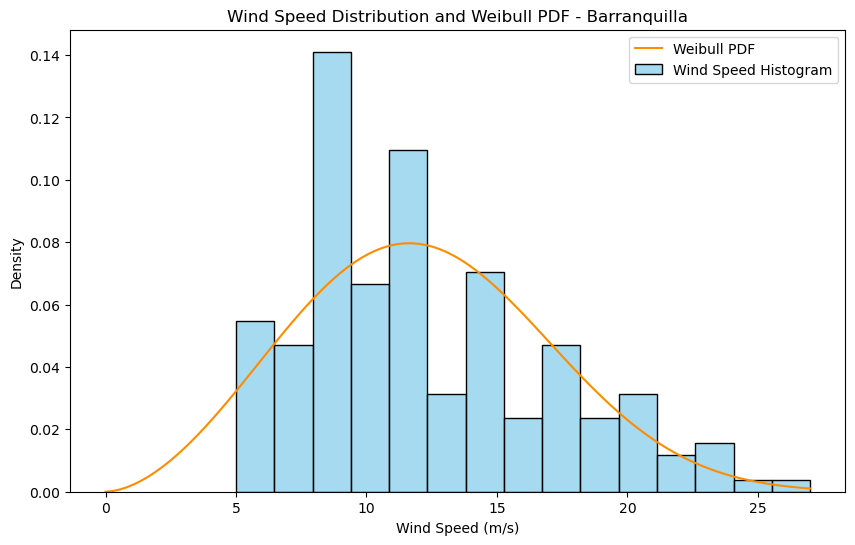

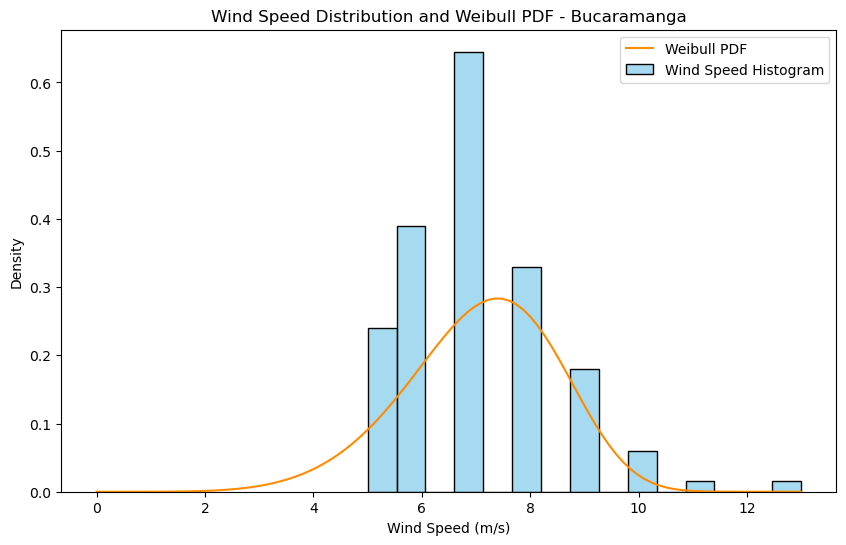

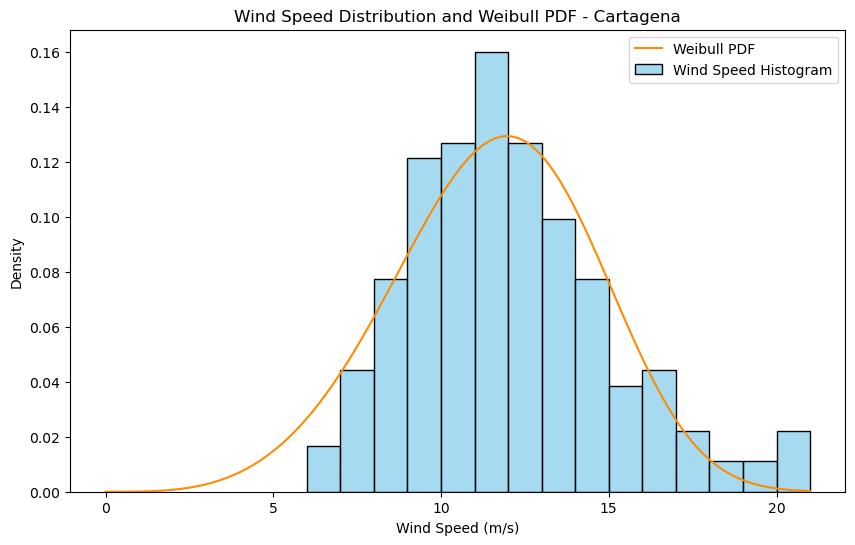

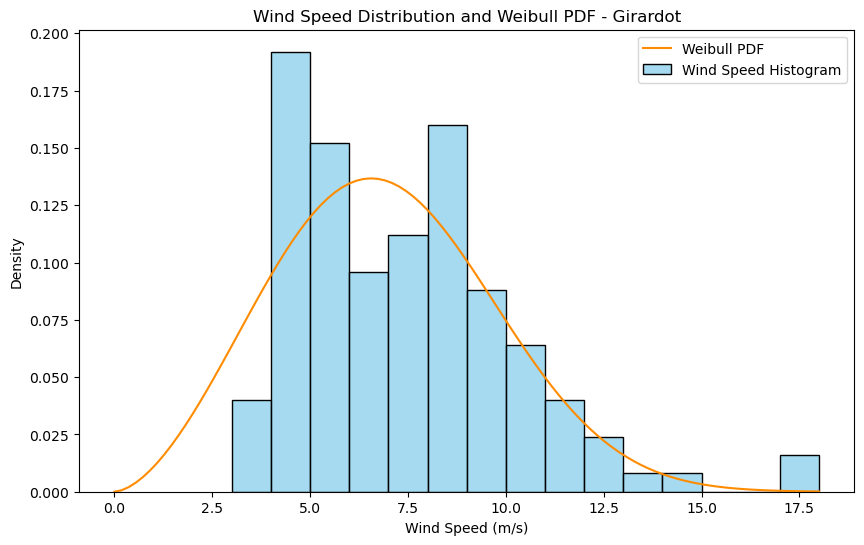

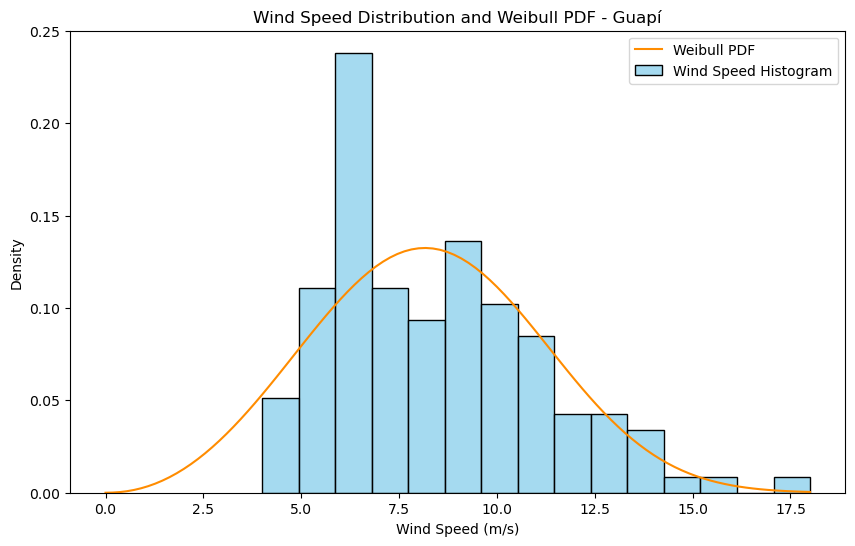

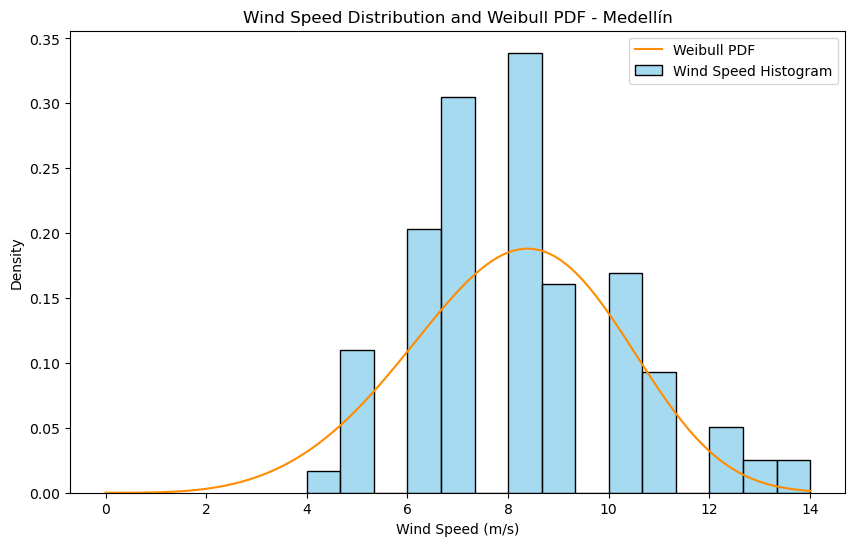

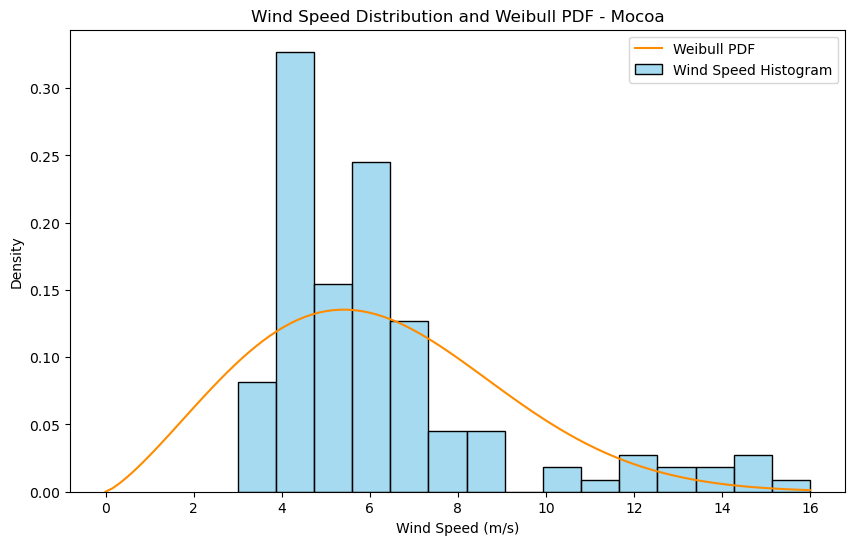

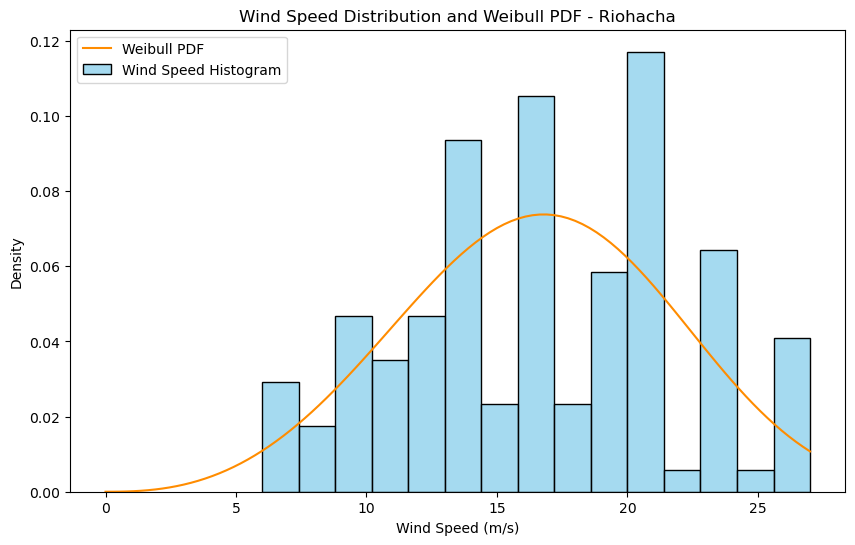

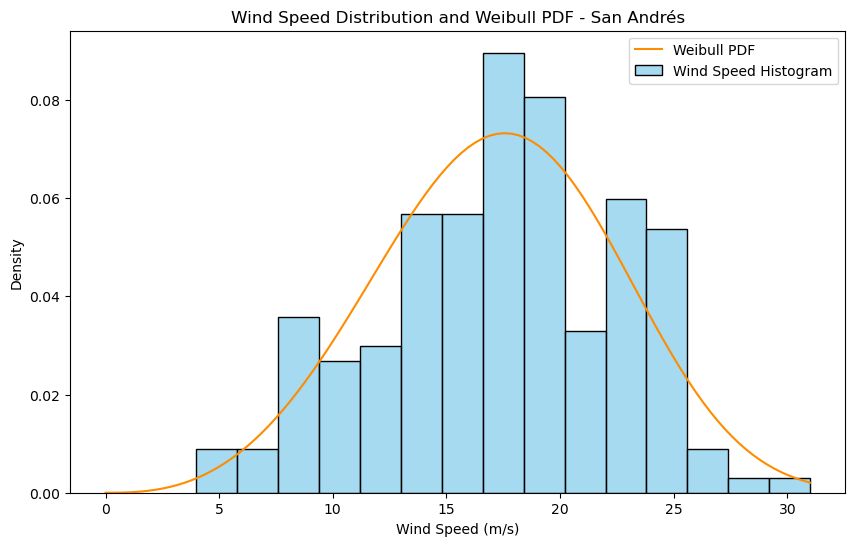

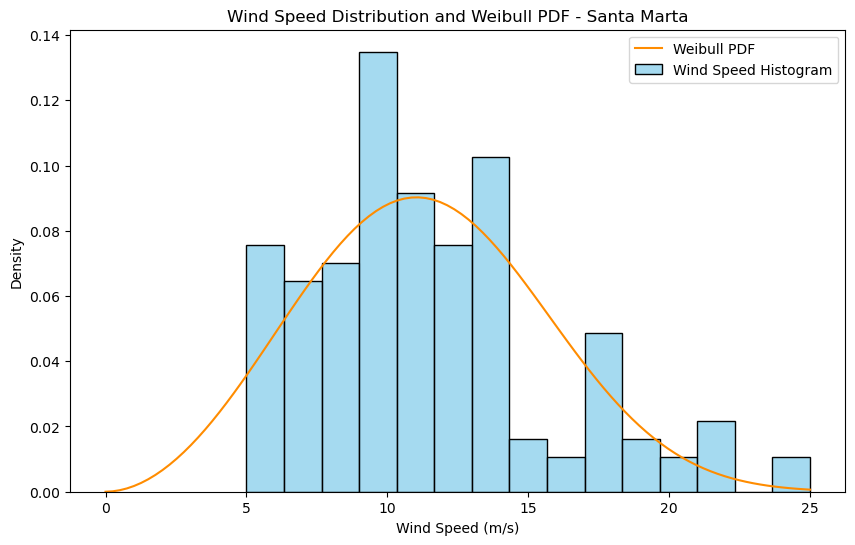

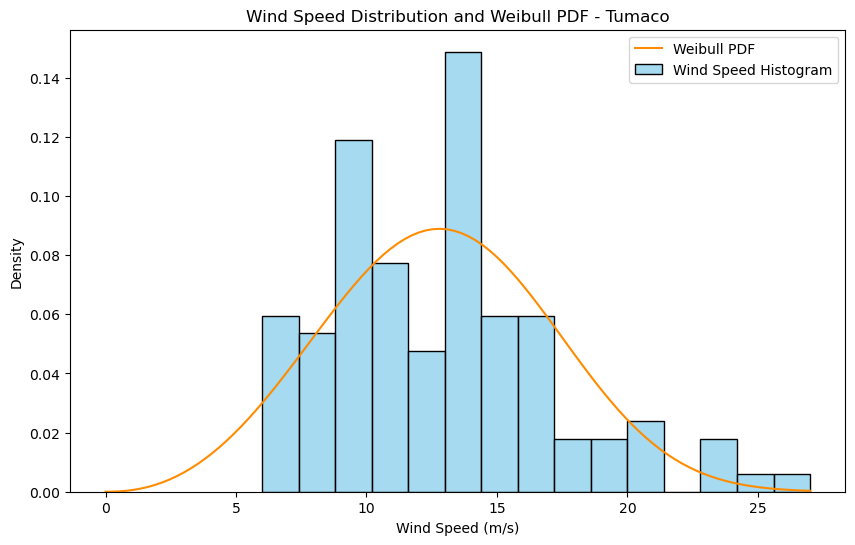

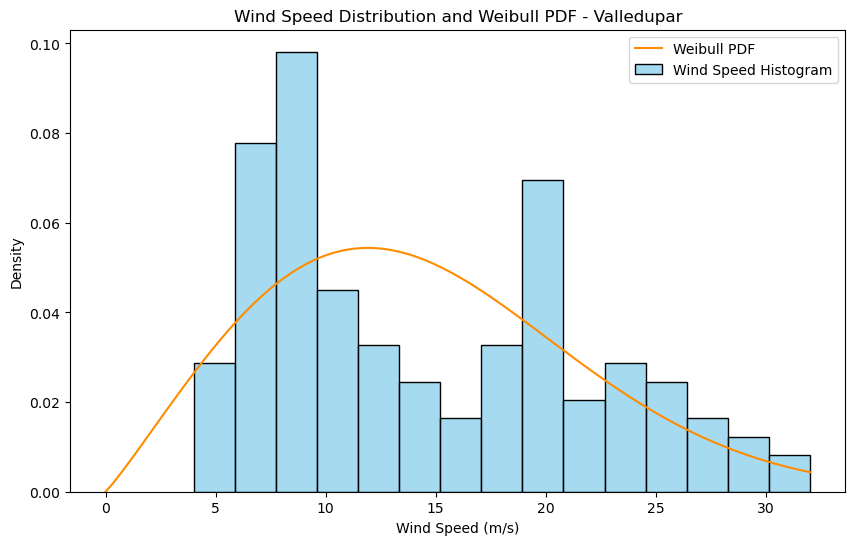

In [55]:
from scipy.special import gamma
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a dictionary to store Weibull distribution results for each city
weibull_results = {}

# Iterate over each city to calculate Weibull parameters and plot
for city, city_data in data.groupby('Municipio'):
    # Calculate the mean and standard deviation of wind speed
    mean_speed = city_data['vel_viento (m/s)'].mean()
    std_dev_speed = city_data['vel_viento (m/s)'].std()
    
    # Calculate the k parameter
    k = (std_dev_speed / mean_speed) ** -1.09
    
    # Calculate the c parameter
    c = mean_speed / gamma(1 + (1 / k))
    
    # Store parameters in the dictionary
    weibull_results[city] = {"k": k, "c": c}
    
    # Plot histogram of wind speed
    plt.figure(figsize=(10, 6))
    sns.histplot(city_data['vel_viento (m/s)'], bins=15, color="skyblue", kde=False, stat="density", edgecolor="black", label="Wind Speed Histogram")

    # Generate a range of wind speed values for plotting the Weibull PDF
    wind_speed_values = np.linspace(0, city_data['vel_viento (m/s)'].max(), 100)
    
    # Calculate Weibull PDF for each value in the range
    f_v = (k / c) * (wind_speed_values / c) ** (k - 1) * np.exp(-(wind_speed_values / c) ** k)
    
    # Plot Weibull PDF
    plt.plot(wind_speed_values, f_v, color="darkorange", label="Weibull PDF")
    
    # Add title and labels
    plt.title(f"Wind Speed Distribution and Weibull PDF - {city}")
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Density")
    plt.legend()
    
    # Show the plot for the current city
    plt.show()

# Most probable wind speed value and the wind speed value that would produce the maximum wind power.

To perform the calculations in each city, we use the equations:

Most likely wind speed ($V_{mp}$):

$V_{mp} = c(\frac{k-1}{k})^{\frac{1}{k}}$

Wind speed for maximum wind power ($V_{max}E$):

$V_{max}E = c(\frac{k+2}{k})^{\frac{1}{k}}$

In [29]:
import pandas as pd
from scipy.special import gamma

file_path = "/Users/mapublume/Downloads/Datos(Municipios).csv"

# Read the CSV file
data = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')

# Clean the 'vel_viento (m/s)' column to ensure it contains numeric values
data['vel_viento (m/s)'] = pd.to_numeric(data['vel_viento (m/s)'].str.replace(',', '.'), errors='coerce')

# Dictionary to store results for each city
wind_speeds_results = {}

# Iterate over each city to calculate k, c, vmp, and vmaxE
for city, city_data in data.groupby('Municipio'):
    # Calculate the mean and standard deviation of wind speed
    mean_speed = city_data['vel_viento (m/s)'].mean()
    std_dev_speed = city_data['vel_viento (m/s)'].std()
    
    # Calculate the k parameter
    k = (std_dev_speed / mean_speed) ** -1.09
    
    # Calculate the c parameter
    c = mean_speed / gamma(1 + (1 / k))
    
    # Calculate vmp (most probable wind speed)
    vmp = c * ((k - 1) / k) ** (1 / k) if k > 1 else None  # Ensure k > 1 for vmp
    
    # Calculate vmaxE (wind speed for maximum wind energy)
    vmaxE = c * ((k + 2) / k) ** (1 / k)
    
    # Store results in the dictionary
    wind_speeds_results[city] = {
        "k": k,
        "c": c,
        "vmp (Most Probable Wind Speed)": vmp,
        "vmaxE (Max Energy Wind Speed)": vmaxE
    }

# Display results for each city
for city, results in wind_speeds_results.items():
    print(f"City: {city}")
    print(f"k parameter: {results['k']:.4f}")
    print(f"c parameter: {results['c']:.4f}")
    print(f"Most Probable Wind Speed (vmp): {results['vmp (Most Probable Wind Speed)']:.4f} m/s")
    print(f"Wind Speed for Maximum Energy (vmaxE): {results['vmaxE (Max Energy Wind Speed)']:.4f} m/s")
    print("-" * 40)

City: Barranquilla
k parameter: 2.7954
c parameter: 14.0253
Most Probable Wind Speed (vmp): 11.9709 m/s
Wind Speed for Maximum Energy (vmaxE): 17.0121 m/s
----------------------------------------
City: Bucaramanga
k parameter: 6.0851
c parameter: 7.8159
Most Probable Wind Speed (vmp): 7.5887 m/s
Wind Speed for Maximum Energy (vmaxE): 8.1896 m/s
----------------------------------------
City: Cartagena
k parameter: 4.1002
c parameter: 12.5366
Most Probable Wind Speed (vmp): 11.7103 m/s
Wind Speed for Maximum Energy (vmaxE): 13.8122 m/s
----------------------------------------
City: Girardot
k parameter: 2.5455
c parameter: 8.0909
Most Probable Wind Speed (vmp): 6.6506 m/s
Wind Speed for Maximum Energy (vmaxE): 10.1606 m/s
----------------------------------------
City: Guapí
k parameter: 3.2213
c parameter: 9.2647
Most Probable Wind Speed (vmp): 8.2550 m/s
Wind Speed for Maximum Energy (vmaxE): 10.7633 m/s
----------------------------------------
City: Medellín
k parameter: 4.1302
c param

## Analysis from the Graphs on Wind Speed and Temperature Variability.

The Weibull probability distribution plots alongside the histograms of wind speeds for each city reveal several key insights into wind speed behavior in different regions. For cities like Riohacha and San Andrés, the Weibull distribution aligns closely with the histogram data, suggesting these cities have a more predictable wind speed pattern. In other cities, there is more deviation from the Weibull curve, which indicates variability in wind behavior and potential fluctuations over time.

The completeness of the Weibull distribution is essential, as it shows the full range of wind speed probabilities, highlighting the extent of stable versus highly variable conditions. This comparison allows for a more comprehensive view of wind patterns in each city, helping assess consistency in wind energy potential.

## Comparison of Cities Based on Maximum Wind Energy Potential.

By comparing values of the most probable wind speed ($v^{mp}$) and the wind speed for maximum energy output ($v^{max}E$) across the selected cities, cities such as Valledupar and San Andrés show higher $v^{max}E$ values. These values suggest they have stronger wind speeds that are suitable for energy generation. Cities with a higher $v^{max}E$ indicate they likely experience higher energy-producing wind speeds more frequently, making them more favorable for wind energy investments.

# Quartile 1 and 3 of the wind speed variable and interquartile range.

Now we calculate Q1, Q3, and the interquartile range (IQR) for each city, and then use the Weibull cumulative distribution function (CDF) F(v) to calculate the probability that the wind speed is in the range between Q1 and Q3.

In [37]:
import pandas as pd
import numpy as np
from scipy.special import gamma
from scipy.stats import weibull_min

# Load the dataset
file_path = "/Users/mapublume/Downloads/Datos(Municipios).csv"

data = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')

# Clean the 'vel_viento (m/s)' column to ensure it contains numeric values
data['vel_viento (m/s)'] = pd.to_numeric(data['vel_viento (m/s)'], errors='coerce')  # Convert to numeric, set errors to NaN

# Drop rows with NaN values in 'vel_viento (m/s)' after conversion
data = data.dropna(subset=['vel_viento (m/s)'])

# Dictionary to store results for each city
quartile_results = {}

# Iterate over each city to calculate Q1, Q3, IQR, and probability within IQR range
for city, city_data in data.groupby('Municipio'):
    # Calculate the k and c parameters for Weibull distribution
    mean_speed = city_data['vel_viento (m/s)'].mean()
    std_dev_speed = city_data['vel_viento (m/s)'].std()
    k = (std_dev_speed / mean_speed) ** -1.09
    c = mean_speed / gamma(1 + (1 / k))
    
    # Calculate Q1 and Q3 using the inverse Weibull CDF (qweibull)
    Q1 = weibull_min.ppf(0.25, k, scale=c)
    Q3 = weibull_min.ppf(0.75, k, scale=c)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the probability of wind speed being between Q1 and Q3
    prob_within_IQR = weibull_min.cdf(Q3, k, scale=c) - weibull_min.cdf(Q1, k, scale=c)
    
    # Store results in the dictionary
    quartile_results[city] = {
        "Q1 (m/s)": Q1,
        "Q3 (m/s)": Q3,
        "IQR (m/s)": IQR,
        "Probability within IQR": prob_within_IQR
    }

# Display results for each city
for city, results in quartile_results.items():
    print(f"City: {city}")
    print(f"Q1: {results['Q1 (m/s)']:.4f} m/s")
    print(f"Q3: {results['Q3 (m/s)']:.4f} m/s")
    print(f"IQR: {results['IQR (m/s)']:.4f} m/s")
    print(f"Probability within IQR: {results['Probability within IQR']:.4f}")
    print("-" * 40)

City: Barranquilla
Q1: 8.7194 m/s
Q3: 15.4384 m/s
IQR: 6.7190 m/s
Probability within IQR: 0.5000
----------------------------------------
City: Bucaramanga
Q1: 6.1676 m/s
Q3: 8.0894 m/s
IQR: 1.9218 m/s
Probability within IQR: 0.5000
----------------------------------------
City: Cartagena
Q1: 9.5422 m/s
Q3: 13.7004 m/s
IQR: 4.1582 m/s
Probability within IQR: 0.5000
----------------------------------------
City: Girardot
Q1: 4.9055 m/s
Q3: 8.8236 m/s
IQR: 3.9181 m/s
Probability within IQR: 0.5000
----------------------------------------
City: Guapí
Q1: 6.2001 m/s
Q3: 10.2371 m/s
IQR: 4.0371 m/s
Probability within IQR: 0.5000
----------------------------------------
City: Medellín
Q1: 6.7037 m/s
Q3: 9.5691 m/s
IQR: 2.8653 m/s
Probability within IQR: 0.5000
----------------------------------------
City: Mocoa
Q1: 4.0345 m/s
Q3: 8.0294 m/s
IQR: 3.9949 m/s
Probability within IQR: 0.5000
----------------------------------------
City: Riohacha
Q1: 12.9731 m/s
Q3: 20.2288 m/s
IQR: 7.2557 m/s
P

## Interquartile Range (IQR):

- Cities such as Valledupar, Riohacha, and San Andrés have notably high IQR values (10.04 m/s, 7.26 m/s, and 7.32 m/s, respectively), indicating significant variability in wind speeds. This high variability suggests that these cities experience both high and low wind speeds frequently, which could imply inconsistent energy production.
- In contrast, cities like Bucaramanga (IQR of 1.92 m/s) and Medellín (IQR of 2.87 m/s) show lower wind speed variability. Lower variability can be beneficial as it often indicates more stable wind speeds, which is ideal for consistent energy output in wind energy applications.

## Quartiles (Q1 and Q3):

- San Andrés and Riohacha display the highest Q1 and Q3 values, meaning that even their lower quartile (Q1) wind speeds are higher than the upper quartile (Q3) wind speeds in other cities like Mocoa or Girardot. This suggests that these cities generally have stronger wind conditions, which is advantageous for wind energy potential.
- Cities with higher Q1 values, such as San Andrés (13.64 m/s) and Riohacha (12.97 m/s), maintain a strong baseline wind speed. These baseline speeds increase the probability of achieving energy production thresholds more consistently, as the wind rarely drops below energy-generating levels.

### Preliminary recommendation for the development of wind energy:

**San Andrés** and **Riohacha** stand out as top candidates for wind energy investment due to their high baseline wind speeds and substantial potential for energy production even during lower wind periods.

In [68]:
import pandas as pd
import numpy as np
from scipy.special import gamma
from scipy.stats import weibull_min

# Dictionary to store results for each city
percentile_results = {}

# Iterate over each city to calculate probability of wind speed exceeding the 60th percentile
for city, city_data in data.groupby('Municipio'):
    # Calculate the k and c parameters for Weibull distribution
    mean_speed = city_data['vel_viento (m/s)'].mean()
    std_dev_speed = city_data['vel_viento (m/s)'].std()
    k = (std_dev_speed / mean_speed) ** -1.09
    c = mean_speed / gamma(1 + (1 / k))
    
    # Calculate the 60th percentile wind speed using the inverse Weibull CDF
    percentile_60 = weibull_min.ppf(0.60, k, scale=c)
    
    # Calculate the probability of wind speed being greater than the 60th percentile
    prob_above_60th_percentile = 1 - weibull_min.cdf(percentile_60, k, scale=c)
    
    # Store results in the dictionary
    percentile_results[city] = {
        "60th Percentile Wind Speed (m/s)": percentile_60,
        "Probability of Exceeding 60th Percentile": prob_above_60th_percentile
    }

# Display results for each city
for city, results in percentile_results.items():
    print(f"City: {city}")
    print(f"60th Percentile Wind Speed: {results['60th Percentile Wind Speed (m/s)']:.4f} m/s")
    print(f"Probability of Exceeding 60th Percentile: {results['Probability of Exceeding 60th Percentile']:.4f}")
    print("-" * 40)

City: Barranquilla
60th Percentile Wind Speed: 13.2823 m/s
Probability of Exceeding 60th Percentile: 0.4000
----------------------------------------
City: Bucaramanga
60th Percentile Wind Speed: 7.5318 m/s
Probability of Exceeding 60th Percentile: 0.4000
----------------------------------------
City: Cartagena
60th Percentile Wind Speed: 12.4558 m/s
Probability of Exceeding 60th Percentile: 0.4000
----------------------------------------
City: Girardot
60th Percentile Wind Speed: 7.5598 m/s
Probability of Exceeding 60th Percentile: 0.4000
----------------------------------------
City: Guapí
60th Percentile Wind Speed: 8.9709 m/s
Probability of Exceeding 60th Percentile: 0.4000
----------------------------------------
City: Medellín
60th Percentile Wind Speed: 8.7131 m/s
Probability of Exceeding 60th Percentile: 0.4000
----------------------------------------
City: Mocoa
60th Percentile Wind Speed: 6.6985 m/s
Probability of Exceeding 60th Percentile: 0.4000
-----------------------------

## Analysis and Discussion of Results

The results indicate that each city has a unique 60th percentile wind speed value (i.e., the wind speed at which 60% of recorded speeds fall below), yet the probability of exceeding this threshold is identical across all cities, consistently at 0.4000. This probability suggests that regardless of regional differences, all cities share a 40% likelihood of having wind speeds above their respective 60th percentile values.

### Why is the Probability the Same Across Cities?

The uniform probability outcome can be attributed to the nature of the Weibull distribution. Specifically, the cumulative distribution function (CDF) used to compute the probability within a certain range provides fixed probability intervals. The CDF effectively models the proportion of values that fall below a certain percentile threshold, such as the 60th percentile, regardless of the absolute wind speed values associated with each city. This approach thus yields a consistent probability for all cities because:

Percentiles are Relative: The 60th percentile inherently marks the same relative position within each city’s wind speed data distribution, regardless of the actual wind speed values.
Weibull Distribution Properties: Weibull distributions, when fit to different datasets, align probabilities at set percentiles like the 60th. Therefore, the probability that wind speeds exceed the 60th percentile remains consistently at 40% across cities.

## Influence of Standard Deviation and Variability

The standard deviation of wind speeds in each city impacts the shape and spread of its respective Weibull distribution. Cities with a higher standard deviation exhibit a broader spread, which leads to a wider range of wind speeds. Conversely, cities with lower standard deviations have more clustered wind speeds. Despite this difference, the fixed 60th percentile probability remains unchanged since the percentile calculation is based on the distribution’s relative structure rather than its absolute spread.

If we also consider potential margin of error in these calculations, particularly from estimating Weibull parameters (shape $k$ and scale $c$), there might be slight variations. However, these deviations are likely minor given the sample size and statistical robustness of the Weibull fit, resulting in little practical impact on the calculated probability of 0.4000.

- **Relative Positioning:** These results highlight the percentile approach's strength in providing relative assessments, allowing comparisons across cities despite differing wind speed distributions.

- **Practical Implications:** For energy generation, this uniformity means that each city has a 40% likelihood of experiencing wind speeds above the median-to-high range (60th percentile), offering a dependable metric for initial assessments of wind energy potential.

### To determine whether the dataset follows a Weibull distribution, I'll be using a Weibull probability plot in Python.

In this plot, if the scatter points align closely with a reference line, it suggests that the data conforms to a Weibull distribution. The x-axis is plotted on a Log10 scale, and the y-axis is plotted on a Double Log Reciprocal scale to match Weibull probability plot conventions.

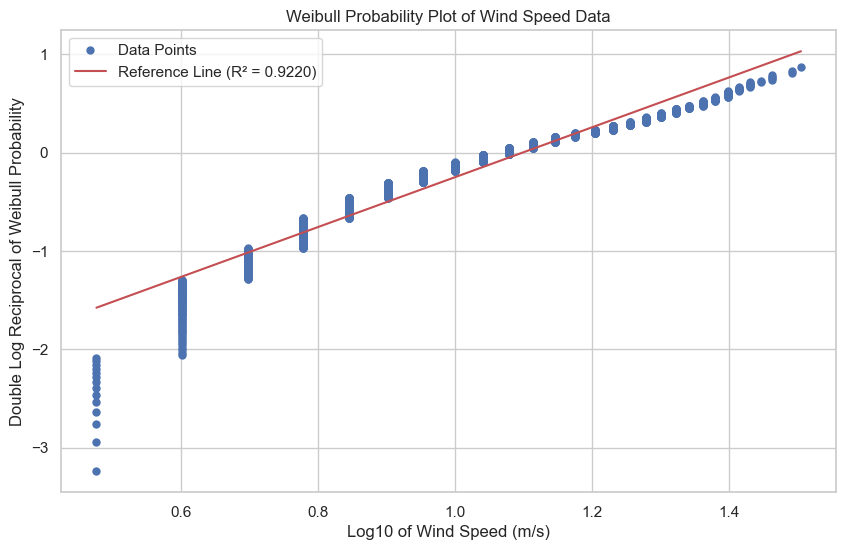

The dataset may not follow a Weibull distribution (R² <= 0.95).


In [75]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Select the wind speed data
wind_speeds = data['vel_viento (m/s)']

# Sort the wind speed data and calculate Weibull probability plot positions
sorted_speeds = np.sort(wind_speeds)
n = len(sorted_speeds)
probabilities = np.arange(1, n + 1) / (n + 1)  # Calculate probabilities

# Apply log transformation to the data and probability
log_speeds = np.log10(sorted_speeds)
log_reciprocal_prob = np.log10(-np.log(1 - probabilities))

# Plotting the Weibull Probability Plot
plt.figure(figsize=(10, 6))
plt.plot(log_speeds, log_reciprocal_prob, 'o', markersize=5, label="Data Points")
slope, intercept, r_value, _, _ = stats.linregress(log_speeds, log_reciprocal_prob)
plt.plot(log_speeds, intercept + slope * log_speeds, 'r-', label=f"Reference Line (R² = {r_value**2:.4f})")

# Setting the x and y labels with the corresponding scales
plt.xlabel("Log10 of Wind Speed (m/s)")
plt.ylabel("Double Log Reciprocal of Weibull Probability")
plt.title("Weibull Probability Plot of Wind Speed Data")
plt.legend()
plt.grid(True)
plt.show()

# Conclusion based on R² value
if r_value**2 > 0.95:
    print("The dataset likely follows a Weibull distribution (R² > 0.95).")
else:
    print("The dataset may not follow a Weibull distribution (R² <= 0.95).")

The results from the Weibull probability plot indicate that the dataset may not closely follow a Weibull distribution, as the $R^2$ value is below 0.95. This suggests that, although the Weibull distribution was used to model the wind speed data across cities, it may not be the best fit for accurately representing all the wind speed characteristics in these datasets. Let’s explore how this outcome connects with the uniform probability results we previously observed across cities.

### Why is the Probability the Same Across Cities?

When we previously calculated the probability that wind speeds exceed the 60th percentile for each city, the result was a consistent 40% probability across all cities. This uniform probability outcome relies on key properties of the Weibull distribution:

- **Percentiles Are Relative:**

The percentile values are calculated based on the distribution's cumulative structure. Regardless of the actual wind speed values, the 60th percentile represents the point at which 60% of values fall below and 40% fall above it.

This means that, in any distribution aligned with Weibull properties, a 60th percentile threshold inherently yields a 40% exceedance probability. Thus, even though wind speed values vary widely from city to city, the relative position of the 60th percentile remains consistent.

- **Weibull Distribution Properties:**

The Weibull distribution is widely used for modeling wind speed because of its flexibility in representing various shapes of data distributions. When fit to a dataset, the Weibull distribution’s cumulative distribution function (CDF) provides consistent probabilities at specified percentiles. Therefore, when applied uniformly across different cities’ wind speed datasets, it gives a consistent 40% probability above the 60th percentile.

### What the Weibull Probability Plot Indicates
The Weibull probability plot, however, suggests that the dataset may not perfectly follow a Weibull distribution. This could explain certain limitations in using a Weibull model for these datasets:

- **Limitations of Consistency Across Cities:** If the data for some cities significantly deviates from the Weibull distribution, the consistency of the 40% exceedance probability could be less accurate for those cities. The R² value from the Weibull probability plot indicates how well the Weibull model fits the dataset. An R² value below 0.95 suggests that other statistical models might capture the wind speed variability more accurately for these datasets.
- **Impact of Variability:** Cities with wind speeds that exhibit extreme variability or other unique characteristics might not align well with a Weibull distribution. This can affect the accuracy of probability predictions based on percentile thresholds.

The Weibull probability plot results highlight a potential misalignment between the dataset and the Weibull model, suggesting that while the Weibull distribution can provide uniform percentiles and probabilities, it may not be the best fit for every city's wind speed data in this project. As a result:

- The assumption of a 40% exceedance probability at the 60th percentile may hold generally but could vary in accuracy for certain cities.
- Considering alternative distributions or more tailored models for wind speed might improve the accuracy of probability estimations and insights for wind energy potential.